In [31]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn import cluster
from scipy import stats  ## for z-score. do we still need it?

In [2]:
# Read Scan On Data
scanOn_samp0 = pd.read_csv('all_scanOn_samp0.csv')

scanOn_samp0.head()

,Mode,BusinessDate,DateTime,CardID,CardType,VehicleID,ParentRoute,RouteID,StopID
0,1,2015-07-02,2015-07-02 13:08:13,1524480,9,1222,415,10883,15084
1,3,2015-07-02,2015-07-02 07:33:58,1756270,2,1091,24,15296,18566
2,1,2015-07-02,2015-07-02 16:42:38,10560630,2,1469,862,10227,19824
3,1,2015-07-01,2015-07-01 11:07:08,11812440,2,2886,458,8591,21184
4,1,2015-07-01,2015-07-01 17:28:14,12272500,2,2853,670,16447,21296


In [3]:
# Read card types
column_names = ("Card_SubType_ID","Card_SubType_Desc","Payment_Type","Fare_Type","Concession_Type","MI_Card_Group")
card_types = pd.read_csv('card_types.txt',sep="|", names=column_names)

card_types.head()

,Card_SubType_ID,Card_SubType_Desc,Payment_Type,Fare_Type,Concession_Type,MI_Card_Group
0,62,Pensioner Concession Card holder PC,Paid,Concession,Other Concession,Other Concession
1,29,Vic HCC - Sickness allowance,Paid,Concession,Other Concession,Other Concession
2,43,First Class Pass,Free,Concession,Free Pass,Other
3,34,PCC - Widow allowance,Paid,Concession,Other Concession,Other Concession
4,47,Victoria Police Travel Authority,Free,Concession,Free Pass,Other


In [4]:
# Read stop locations
column_names = ("StopLocationID","StopNameShort","StopNameLong","StopType","SuburbName","PostCode","RegionName","LocalGovernmentArea","StatDivision","GPSLat","GPSLong")
stop_locations = pd.read_csv('stop_locations.txt',sep="|", names=column_names)

stop_locations.head()

,StopLocationID,StopNameShort,StopNameLong,StopType,SuburbName,PostCode,RegionName,LocalGovernmentArea,StatDivision,GPSLat,GPSLong
0,867,Weemala Court,Weemala Ct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.689596,145.105088
1,868,Crana Grove,Crana Gr/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.686742,145.105588
2,869,Punkerri Circuit,Punkerri Cct/Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.683643,145.108743
3,870,Plenty River Drive,231 Plenty River Dr (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.682591,145.111331
4,875,Oldstead Rd,Oldstead Rd/Diamond Creek Rd (Greensborough),Kerbside,Greensborough,3088.0,Melbourne,Banyule,Greater Metro,-37.685336,145.117319


In [5]:
# Read calendar
column_names = ("Date","CalendarYear","FinancialYear","FinancialMonth","CalendarMonth","CalendarMonthSeq","CalendarQuarter","FinancialQuarter","CalendarWeek","FinancialWeek","DayType""DayTypeCategory","WeekdaySeq","WeekDay","FinancialMonthSeq","FinancialMonthName","MonthNumber","ABSWeek","WeekEnding","QuarterName")
calendar = pd.read_csv('calendar.txt',sep="|", names=column_names)

calendar.head()

,,,Date,CalendarYear,FinancialYear,FinancialMonth,CalendarMonth,CalendarMonthSeq,CalendarQuarter,FinancialQuarter,CalendarWeek,FinancialWeek,DayTypeDayTypeCategory,WeekdaySeq,WeekDay,FinancialMonthSeq,FinancialMonthName,MonthNumber,ABSWeek,WeekEnding,QuarterName
20170930,2017-09-30,2017,FY2017 - 2018,9,September,201709,2017Q3,FY17-18Q1,39,13,Saturday,Weekend,Saturday,6,Saturday,201709,Sep 17/,9,1239,w/e 2017-09-30,September Qtr. 2017
20080615,2008-06-15,2008,FY2007 - 2008,18,June,200806,2008Q2,FY07-08Q4,24,50,Sunday,Weekend,Sunday,7,Sunday,200818,Jun 07/,6,755,w/e 2008-06-21,June Qtr. 2008
20040222,2004-02-22,2004,FY2003 - 2004,14,February,200402,2004Q1,FY03-04Q3,8,34,Sunday,Weekend,Normal Sunday,7,Sunday,200414,Feb 03/,2,530,w/e 2004-02-28,March Qtr. 2004
20190620,2019-06-20,2019,FY2018 - 2019,18,June,201906,2019Q2,FY18-19Q4,24,51,Weekday,Weekday,0,4,Thursday,201906,Jun 18/,6,1329,w/e 2019-06-22,June Qtr. 2019
20170831,2017-08-31,2017,FY2017 - 2018,8,August,201708,2017Q3,FY17-18Q1,35,9,Weekday,Weekday,Normal Weekday,4,Thursday,201708,Aug 17/,8,1235,w/e 2017-09-02,September Qtr. 2017


In [7]:
stop_locations.dtypes

StopLocationID           int64
StopNameShort           object
StopNameLong            object
StopType                object
SuburbName              object
PostCode               float64
RegionName              object
LocalGovernmentArea     object
StatDivision            object
GPSLat                 float64
GPSLong                float64
dtype: object

In [25]:
####################################################################################### 
# INITIALIZING MODEL PARAMETERS FOR TESTING
# VARIABLES EXPLORED: HORIZONTAL HYRDO to VERTICAL HYRDO
##############################################################################

## CHANGE THESE TWO VALUES WHEN TESTING DIFFERENT RELATIONSHIPS
variable_1 = 9 #GPS LAT
variable_2 = 10 #GPS LONG

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_prep = stop_locations.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)
model_df = model_prep.iloc[:,[variable_1,variable_2]] 
model = pd.DataFrame(model_df, index=model_df.index, columns=model_df.columns)

In [19]:
#Elbow curve #Elbow cu #Elbow c 
current_clmns = []

current_clmns.append(model_prep.columns[variable_1])
current_clmns.append(model_prep.columns[variable_2])

Text(0,0.5,'Sum Squared Error')

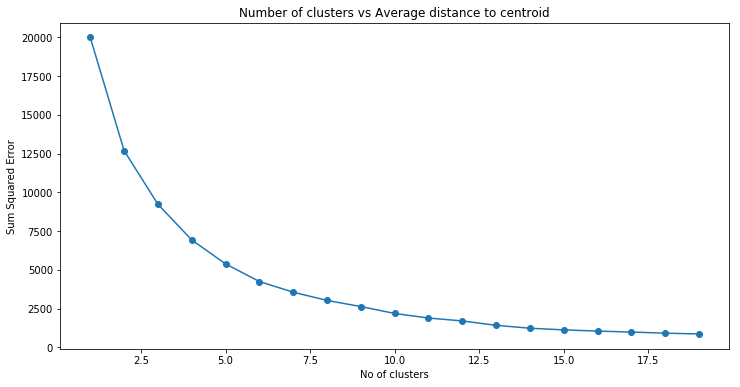

In [20]:
# In the preliminary stage of modelling, different k values for the elbow curve were compared.
# This was used to narrow down the range of k values to test

df_tr_std = stats.zscore(model[current_clmns])

cluster_range_elbow  = range( 1, 20 )
cluster_errors_elbow = []

for num_clusters in cluster_range_elbow:
    clusters = cluster.KMeans( num_clusters )
    clusters.fit( df_tr_std )
    cluster_errors_elbow.append( clusters.inertia_ )

#Graph- Elbow Curve
clusters_df_elbow = pd.DataFrame( { "num_clusters":cluster_range_elbow, "cluster_errors": cluster_errors_elbow } )
plt.figure(figsize=(12,6))
plt.plot( clusters_df_elbow.num_clusters, clusters_df_elbow.cluster_errors, marker = "o" )
plt.title("Number of clusters vs Average distance to centroid")
plt.xlabel('No of clusters')
plt.ylabel('Sum Squared Error')

In [21]:
## Based on above good k value approximately = 7

In [22]:
#Test the change in sum squared error for different seed values

seed_range  = range( 1, 9 )
cluster_errors = []

for seed_num in seed_range:
    clusters = cluster.KMeans( n_clusters=9, random_state=seed_num )
    clusters.fit( df_tr_std )
    cluster_errors.append( clusters.inertia_ )

seed_df = pd.DataFrame( { "seed number":seed_range, "cluster_errors": cluster_errors } )
seed_df[0:10]

,seed number,cluster_errors
0,1,2612.461572
1,2,2602.213819
2,3,2596.516696
3,4,2602.268081
4,5,2652.528206
5,6,2596.447471
6,7,2611.289907
7,8,2609.221403


In [23]:
# Comparing number of clusters vs sum squared error
df_tr_std = stats.zscore(model_prep[current_clmns])

# Test range for the number of clusters based on observations of the elbow curve for the default number of iterations of 300
cluster_range  = range( 4, 10 )
cluster_errors = []
cluster_error_percent_change = []
seed_num = 4

# The number of iterations of K Means that are tested against each k number of clusters. Default number of iterations is 300.
Iterations_range  = [150, 200, 250, 300, 500]
cluster_range_total = []
Iterations_total = []
cluster_errors = []

#Index value used to keep track of the error rate
i = 0

for it in Iterations_range:
    for num_clusters in cluster_range:
        clusters = cluster.KMeans( num_clusters, max_iter= it, random_state= seed_num)
        clusters.fit( df_tr_std )
        cluster_errors.append( clusters.inertia_ )
        Iterations_total.append(it)
        cluster_range_total.append(num_clusters)
        if (i>1):
            cluster_error_percent_change.append((cluster_errors[i-1]-cluster_errors[i])/(cluster_errors[i]+cluster_errors[i-1])*100)
        else:
            cluster_error_percent_change.append(0)
        i = i + 1

In [16]:
#Print Error table
clusters_df = pd.DataFrame( { "num_clusters":cluster_range_total, "num_iterations":Iterations_total, "cluster_error_percent_change (%)": cluster_error_percent_change, "cluster_errors": cluster_errors  } )

# Sort clusters_df by cluster_errors then by cluster_error_percent_change 
clusters_df_sorted = clusters_df.sort_values(['cluster_errors','cluster_error_percent_change (%)'],ascending=True)
clusters_df_sorted = clusters_df_sorted.reindex(["num_clusters", "num_iterations", "cluster_error_percent_change (%)", "cluster_errors"], axis=1)
clusters_df_sorted[0:16]

,num_clusters,num_iterations,cluster_error_percent_change (%),cluster_errors
5,9,150,8.332412,2602.268081
11,9,200,8.332412,2602.268081
17,9,250,8.332412,2602.268081
23,9,300,8.332412,2602.268081
29,9,500,8.332412,2602.268081
4,8,150,7.623876,3075.350645
10,8,200,7.623876,3075.350645
16,8,250,7.623876,3075.350645
22,8,300,7.623876,3075.350645
28,8,500,7.623876,3075.350645


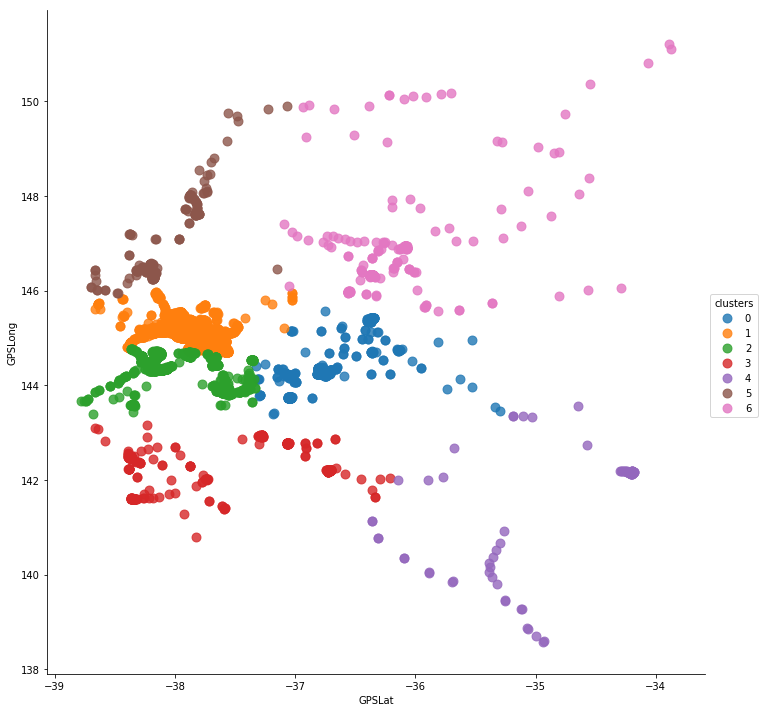

In [29]:
#######################################
# NOW RUN MODEL, VISUALISE AND VALIDATE
#######################################

### DBSCANS ARGUMENTS
no_clusters = 7
random_state = 4

# ASSIGN THE VARIABLES BEING TESTED TO THE MODEL_DF OBJECT
model_prep = stop_locations.copy(deep=True) 
model_prep.drop(model_prep.index[10000:], inplace=True)
model_df = model_prep.iloc[:,[variable_1,variable_2]] 
model = pd.DataFrame(model_df, index=model_df.index, columns=model_df.columns)

########################
##MODELLING SECTION
########################
dbs = cluster.KMeans(n_clusters = no_clusters, random_state=random_state, max_iter=150) # Run the model
dbs_fit = dbs.fit(model)
labels = dbs_fit.labels_
model['clusters'] = labels
model_prep['clusters'] = labels
model['c'] = "count"
#model['target'] = model_prep['Geo_Zone']

sns.lmplot("GPSLat","GPSLong",data=model,fit_reg=False, hue="clusters",scatter_kws={"marker": "D", "s": 80}, size=10,aspect=1)

In [35]:
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap

output_file("gmap.html")

map_options = GMapOptions(lat=30.2861, lng=-97.7394, map_type="roadmap", zoom=11)

# For GMaps to function, Google requires you obtain and enable an API key:
#
#     https://developers.google.com/maps/documentation/javascript/get-api-key
#
# Replace the value below with your personal API key:
p = gmap("GOOGLE_API_KEY", map_options, title="Melbourne")

source = ColumnDataSource(
    data=dict(lat=[ 30.29,  30.20,  30.29],
              lon=[-97.70, -97.74, -97.78])
)

p.circle(x="lon", y="lat", size=15, fill_color="blue", fill_alpha=0.8, source=source)

show(p)